# Previção de Downloads

O neurônio é dividido em 3 componentes principais: 

* Os dendritos, que são os receptores de sinal, então dos bilhões de neurônios do seu cérebro, todos eles têm receptores, que vão receber estímulos de outros neurônios, então eles recebem os sinais
* o corpo processa os sinais recebidos do próprio neurônio e;
* axônio transmite o sinal para os próximos neurônios.


Redes neurais recorrentes são uma classe de redes neurais que lidam com dados temporais. 

Long short-term memory (LSTM) tem um fluxo de controle semelhante a uma rede neural recorrente, no sentido de que processa os dados enquanto passa informações à medida que se propagam para frente. A diferença real está nas operações dentro das células da rede de memória de longo prazo. Essas operações permitem que o LSTM mantenha ou esqueça as informações. 

As LSTMs permitem a retropropagação do erro através do tempo e das camadas, ajudando assim a preservá-los. Um modelo LSTM (Long short-term memory) é uma arquitetura de rede neural recorrente artificial (RNN) que possui conexões de feedback, tornando-a capaz de processar não apenas pontos de dados individuais, mas também sequências inteiras de dados. 

## Hiperparametros Relevantes

### Número de nós e Camadas Ocultas

As camadas entre as camadas de entrada e saída são chamadas de camadas ocultas. Esse conceito fundamental é o que faz com que as redes de aprendizagem profunda sejam denominadas de “caixa preta”, muitas vezes sendo criticadas por não serem transparentes e suas previsões não serem rastreáveis por humanos.

Não há um número final sobre quantos nós (neurônios ocultos) ou camadas ocultas deve-se usar, portanto, dependendo do problema individual (acredite ou não), uma abordagem de tentativa e erro dará os melhores resultados.

Como regra geral, uma camada oculta funcionará com a maioria dos problemas simples e duas camadas com os razoavelmente complexos. Além disso, embora muitos nós (com técnicas de regularização) dentro de uma camada possam aumentar a precisão, um número menor de nós pode causar ajuste insuficiente.

### Números de unidades em uma camada densa

* Método: model.add (Dense (10, ...))

Uma camada densa é a camada mais frequentemente usada, que é basicamente uma camada onde cada neurônio recebe entrada de todos os neurônios na camada anterior - portanto, “densamente conectados”. Camadas densas melhoram a precisão geral e 5 a 10 unidades ou nós por camada é uma boa base. Portanto, a forma de saída da camada densa final será afetada pelo número de neurônios / unidades especificados.

###  Dropout

* Method: model.add(LSTM(…, dropout=0.5))


Cada camada LSTM deve ser acompanhada por uma camada de eliminação (dropout layer). 

Essa camada ajuda a evitar ajustes excessivos no treinamento, ignorando neurônios selecionados aleatoriamente, reduzindo assim a sensibilidade a pesos específicos de cada neurônio. Embora as camadas dropout possam ser usadas com camadas de entrada, elas não devem ser usadas com camadas de saída, pois isso pode atrapalhar a saída do modelo e o cálculo do erro. 

Embora, adicionar mais complexidade possa causar o risco de overfitting (aumentando os nós em camadas densas ou adicionando mais número de camadas densas e ter uma precisão de validação mais pobre), isso pode ser resolvido adicionando dropout.

Um bom ponto de partida é 20%, mas o valor de dropout deve ser mantido pequeno (até 50%). O valor de 20% é amplamente aceito como o melhor compromisso entre evitar o sobreajuste do modelo e reter a precisão do modelo.

### Inicialização dos pesos

Idealmente, é melhor empregar diferentes esquemas de inicialização de peso de acordo com a função de ativação usada.

No entanto, mais comumente, uma distribuição uniforme é usada ao escolher os valores de peso iniciais. Não é possível definir todos os pesos para 0,0, pois a assimetria no gradiente de erro é trazida pelo algoritmo de otimização; para começar a pesquisar com eficácia. 

Diferentes conjuntos de pesos resultam em diferentes pontos de partida do processo de otimização, podendo levar a diferentes conjuntos finais com diferentes características de desempenho. 

Os pesos devem finalmente ser inicializados aleatoriamente para números pequenos (uma expectativa do algoritmo de otimização estocástica, também conhecido como descida gradiente estocástica) para aproveitar a aleatoriedade no processo de pesquisa.

### Taxa de Decaimento

A redução de peso pode ser incluída na regra de atualização de peso que faz com que os pesos diminuam para zero exponencialmente, se nenhuma outra atualização de peso estiver programada. Após cada atualização, os pesos são multiplicados por um fator um pouco menor que 1, evitando que aumentem muito. Isso especifica a regularização na rede.

O valor padrão de 0,97 deve ser suficiente para começar.

### Função de Ativação

As funções de ativação são o que define a saída de um nó como LIGADA ou DESLIGADA. 

Essas funções são usadas para introduzir a não linearidade aos modelos, permitindo que os modelos de aprendizado profundo aprendam os limites de predição não lineares. Tecnicamente, as funções de ativação podem ser incluídas nas camadas densas, mas dividi-las em camadas diferentes torna possível recuperar a saída reduzida da camada de densidade.

Novamente, a escolha da camada de ativação depende da aplicação, no entanto, a função de ativação do retificador (rectifier) é a mais popular. Situações específicas implicam funções específicas. Por exemplo, a ativação sigmóide é usada na camada de saída para previsões binárias e softmax é usado para fazer previsões multiclasse (softmax dá a capacidade de interpretar as saídas como probabilidades).

Método: o processo consiste em criar funções definidas pelo usuário e fazer com que retorne a saída associada a qualquer função de ativação específica. Por exemplo, aqui está uma função de ativação sigmóide:

def sigmóide (x):

    return 1 / (1 + np.exp (-x))

Sigmóide (log-sigmóide) e tangente hiperbólica são algumas das funções de ativação mais populares adotadas em blocos LSTM.

Funções mais usadas:
* Rectified Linear Activation (ReLU)
* Logistic (Sigmoid)
* Hyperbolic Tangent (Tanh)

### Taxa de Aprendizagem (Learning Rate)

Este hiperparâmetro define a rapidez com que a rede atualiza seus parâmetros. 

Definir uma taxa de aprendizado mais alta acelera o aprendizado, mas o modelo pode não convergir (um estado durante o treinamento em que a perda se estabelece dentro de uma faixa de erro em torno do valor final), ou mesmo diverge. 

Por outro lado, uma taxa mais baixa tornará o aprendizado drasticamente mais lento, pois os passos em direção ao mínimo da função de perda serão pequenos, mas permitirão que o modelo convirja suavemente.

Normalmente, uma taxa de aprendizagem decrescente é preferida e este hiperparâmetro é usado na fase de treinamento e tem um pequeno valor positivo, principalmente entre 0,0 e 0,1.

### Número de épocas (epochs)

Esses hiperparâmetros definem quantas iterações completas do conjunto de dados devem ser executadas. 

Embora teoricamente esse número possa ser definido como um valor inteiro entre um e infinito, ele deve ser aumentado até que a precisão da validação comece a diminuir, mesmo que a precisão do treinamento aumente (e, portanto, com risco de overfitting).

Uma dica é empregar o método de parada antecipada, para primeiro especificar um grande número de períodos de treinamento e interromper o treinamento assim que o desempenho do modelo parar de melhorar por um limite predefinido no conjunto de dados de validação.

### Tamanho do Batch

Este hiperparâmetro define o número de amostras a serem trabalhadas antes que os parâmetros internos do modelo sejam atualizados. Tamanhos grandes criam grandes degraus de gradiente em comparação com os menores para o mesmo número de amostras “vistas”.

Amplamente aceito, um bom valor padrão para o tamanho do lote é 32. Para experimentação, você pode tentar múltiplos de 32, como 64, 128 e 256.

## Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM,GRU, Flatten,Dropout


from sklearn.metrics import mean_squared_error

In [2]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size']=22
sns.set_style('darkgrid')

In [8]:
def create_index_datatime(df):
    
    format = '%Y-%m-%d'
    
    df['data'] = pd.to_datetime(df['Date'],format=format).dt.date
    
    df = df.set_index('Date')
    
    return df

In [3]:
def split_nlegs(vetor, n_passos):
    """
        Entrada: vetor: numero de Passageiros
                 n_passos: numero de passos no regressor
        Saida:
            X_novo: Array 2D
            y_novo: Array 1D - Nosso alvo (target)
    
    """
    # Inicializacao dos novos vetores 
    X_novo, y_novo = [],[]
    
    #percorrer o vetor de entrada e agregar valores aos novos vetores
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo),np.array(y_novo)
    
    return X_novo, y_novo

In [4]:
def reshape_dataframe(y_train, y_test,n_passos):
    
    vetor_train = pd.DataFrame(y_train)[0]
    vetor_test = pd.DataFrame(y_test)[0]

    X_train_new, y_train_new = split_nlegs(vetor_train, n_passos)
    X_test_new, y_test_new = split_nlegs(vetor_test, n_passos)
    
    X_train_new = X_train_new.reshape((X_train_new.shape[0],X_train_new.shape[1],1))
    X_test_new = X_test_new.reshape((X_test_new.shape[0],X_test_new.shape[1],1))
    
    print(X_train_new.shape,X_test_new.shape)
    
    return X_train_new, y_train_new, X_test_new, y_test_new

In [9]:
sp500 = create_index_datatime(pd.read_csv('df_sp500.csv'))

In [10]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,data
Date,,,,,,,
1999-01-04,1229.229980,1248.810059,1219.099976,1228.099976,1228.099976,877000000,1999-01-04
1999-01-05,1228.099976,1246.109985,1228.099976,1244.780029,1244.780029,775000000,1999-01-05
1999-01-06,1244.780029,1272.500000,1244.780029,1272.339966,1272.339966,986900000,1999-01-06
1999-01-07,1272.339966,1272.339966,1257.680054,1269.729980,1269.729980,863000000,1999-01-07
1999-01-08,1269.729980,1278.239990,1261.819946,1275.089966,1275.089966,937800000,1999-01-08


In [11]:
target = 'Close'

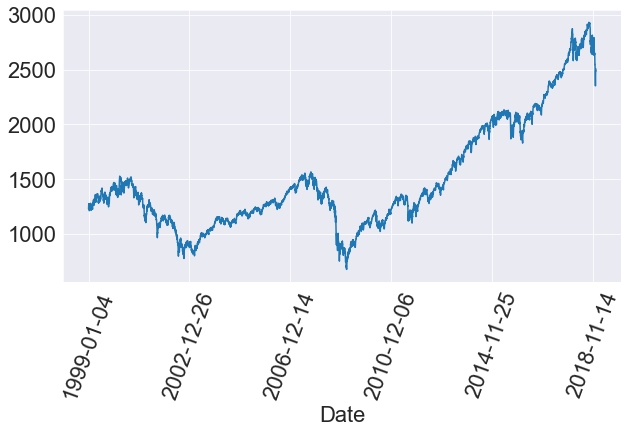

In [12]:
sp500[target].plot(figsize=(10,5))
plt.xticks(rotation=70)
plt.show()

### Scaling 

In [13]:
df = sp500[target]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(np.array(df).reshape(-1,1))

In [15]:
df_scaled.shape

(5031, 1)

### Reshape Time series

In [62]:
train = df_scaled[0:4000]
test = df_scaled[4000:]

In [63]:
len(train), len(test)

(4000, 1031)

In [65]:
n_passos = 14

X_train, y_train, X_test, y_test = reshape_dataframe(train, test, n_passos)

(3986, 14, 1) (1017, 14, 1)


## Building LSTM Models

A rede neural Long Short-Term Memory, ou rede LSTM, é uma rede neural recorrente que é treinada usando Backpropagation Through Time. Como tal, ela pode ser usado para criar grandes redes recorrentes que, por sua vez, podem ser usadas para resolver problemas de difíceis sequências em aprendizado de máquina.

Em vez de neurônios, as redes LSTM têm blocos de memória que são conectados por meio de camadas.

Um bloco possui componentes que o tornam mais inteligente do que um neurônio clássico e uma memória para sequências recentes. Um bloco contém portas que gerenciam o estado e a saída do bloco, e este bloco opera em uma sequência de entrada e cada porta dentro de um bloco usa as unidades de ativação sigmóide para controlar se elas são disparadas ou não, tornando a mudança de estado e adição de informações que fluem através do bloco condicional.

Existem três tipos de portas dentro de uma unidade:

* Forget Gate: decide condicionalmente quais informações jogar fora do bloco.
* Porta de entrada: decide condicionalmente quais valores da entrada atualizar o estado da memória.
* Porta de saída: decide condicionalmente o que produzir com base na entrada e na memória do bloco.

Cada unidade é como uma mini-máquina de estados onde os portões das unidades possuem pesos que são aprendidos durante o procedimento de treinamento.

**Vanilla LSTM**

Um Vanilla LSTM é um modelo LSTM que possui uma única camada oculta de unidades LSTM e uma camada de saída usada para fazer uma previsão. A chave da definição é a forma da entrada, isso é o que o modelo espera como entrada para cada amostra em termos do número de etapas de tempo e do número de features.

Estamos trabalhando com uma série univariada, então o número de recursos é um, para uma variável.

* model = Sequential()
* model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
* model.add(Dense(1))
* model.compile(optimizer='adam', loss='mse')

**Stacked LSTM**

Múltiplas camadas ocultas do LSTM  podem ser empilhadas uma sobre a outra, no que é conhecido como modelo LSTM Empilhado.

Uma camada LSTM requer uma entrada tridimensional e LSTMs por padrão produzirão uma saída bidimensional como uma interpretação do final da sequência.

Podemos resolver isso fazendo com que o LSTM produza um valor para cada intervalo de tempo nos dados de entrada, definindo o argumento return_sequences = True na camada. Isso nos permite ter uma saída 3D da camada LSTM oculta como entrada para a próxima.

* model = Sequential()
* model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
* model.add(LSTM(50, activation='relu'))
* model.add(Dense(1))
* model.compile(optimizer='adam', loss='mse')


**LSTM bidirecional**

Em alguns problemas de predição, pode ser benéfico permitir que o modelo LSTM aprenda a sequência de entrada tanto para frente quanto para trás e concatenar ambas as interpretações.

Isso é chamado de LSTM bidirecional.

Podemos implementar um LSTM Bidirecional para previsão de série temporal univariada envolvendo a primeira camada oculta em uma camada de invólucro chamada Bidirecional.


* model = Sequential()
* model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
* model.add(Dense(1))
* model.compile(optimizer='adam', loss='mse')

In [73]:
def build_model(X_train,y_train,X_test,y_test,name):
    
    '''
    This function build the Feed Forward Neural Network model with a variable number of nodes.
    '''
    #input_dim=lags, activation=activation_func
    
    model = Sequential()
    
    if(name == 'gru'):
        model.add(GRU(128, input_shape=(X_train.shape[1],X_train.shape[2])))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='RMSProp')

        history = model.fit(X_train, y_train,validation_data=(X_test,y_test),
                            epochs=300,verbose=1)

        model.summary()
        
    else:
        model.add(LSTM(256, activation ='relu', return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
        model.add(Dense(128,activation ='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64,activation ='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(10,activation ='relu'))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='RMSProp') #adam, RMSProp

        history = model.fit(X_train, y_train,
                            validation_data=(X_test,y_test),validation_split=0.2,
                            epochs=100,verbose=1)

        model.summary()
    
    return model,history

In [74]:
name = ''
model,history = build_model(X_train,y_train,X_test,y_test,name)

Epoch 1/100
100/100 [==============================] - 5s 38ms/step - loss: 0.0042 - val_loss: 0.0075
Epoch 2/100
100/100 [==============================] - 3s 33ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 3/100
100/100 [==============================] - 3s 32ms/step - loss: 8.4990e-04 - val_loss: 0.0046
Epoch 4/100
100/100 [==============================] - 3s 33ms/step - loss: 7.2536e-04 - val_loss: 0.0050
Epoch 5/100
100/100 [==============================] - 4s 36ms/step - loss: 6.5776e-04 - val_loss: 0.0036
Epoch 6/100
100/100 [==============================] - 3s 34ms/step - loss: 5.8525e-04 - val_loss: 0.0042
Epoch 7/100
100/100 [==============================] - 3s 33ms/step - loss: 5.5951e-04 - val_loss: 0.0035
Epoch 8/100
100/100 [==============================] - 3s 31ms/step - loss: 5.2782e-04 - val_loss: 0.0010
Epoch 9/100
100/100 [==============================] - 3s 30ms/step - loss: 5.0604e-04 - val_loss: 0.0027
Epoch 10/100
100/100 [==============================] 

100/100 [==============================] - 3s 27ms/step - loss: 3.1483e-04 - val_loss: 0.0016
Epoch 78/100
100/100 [==============================] - 3s 26ms/step - loss: 3.0372e-04 - val_loss: 0.0023
Epoch 79/100
100/100 [==============================] - 3s 28ms/step - loss: 3.0127e-04 - val_loss: 0.0016
Epoch 80/100
100/100 [==============================] - 3s 25ms/step - loss: 3.0395e-04 - val_loss: 0.0029
Epoch 81/100
100/100 [==============================] - 3s 26ms/step - loss: 3.0078e-04 - val_loss: 0.0018
Epoch 82/100
100/100 [==============================] - 3s 28ms/step - loss: 3.0013e-04 - val_loss: 0.0033
Epoch 83/100
100/100 [==============================] - 3s 32ms/step - loss: 3.0267e-04 - val_loss: 0.0032
Epoch 84/100
100/100 [==============================] - 3s 32ms/step - loss: 2.9533e-04 - val_loss: 0.0030
Epoch 85/100
100/100 [==============================] - 3s 30ms/step - loss: 2.9877e-04 - val_loss: 0.0021
Epoch 86/100
100/100 [============================

In [68]:
#model.config()

AttributeError: 'Sequential' object has no attribute 'config'

## Evaluate Model

In [69]:
test_result = model.predict(X_test)

In [70]:
#resultado teste
print("Resultado teste: ",np.argmax(test_result[0]))
print("Numero downloads teste: ", y_test[0])

Resultado teste:  7
Numero downloads teste:  0.5750148511127711


In [71]:
#perda do teste e a segunda a acuracia
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 11ms/step - loss: 0.0104


0.01040142122656107

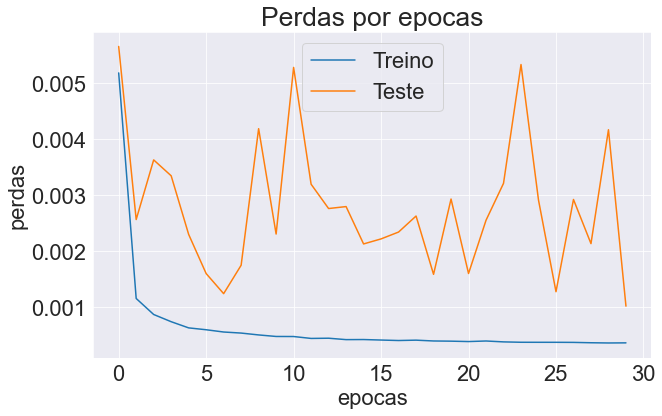

In [72]:
plt.title("Perdas por epocas")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['Treino','Teste'])
plt.show()

### Simple prediction

In [60]:
def inverse_predictions(model, scaler, X_train, X_test):
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    
    return train_predict, test_predict    

In [61]:
def metrics(y_train, y_test, train_predict, test_predict):
    print("Train RMSE",math.sqrt(mean_squared_error(y_train,train_predict)))
    print("Test RMSE",math.sqrt(mean_squared_error(y_test,test_predict)))
    

In [62]:
train_predict, test_predict = inverse_predictions(model, scaler, X_train, X_test)

In [63]:
metrics(y_train, y_test, train_predict, test_predict)

Train RMSE 4406115.717565158
Test RMSE 7017867.72517529


### Predict Next N months

In [67]:
def get_forecast(model,x_input,n_steps,steps):
    
    n_features = 1
    
    temp_input=list(x_input)
    lst_output = []
    i = 0
    while (i<steps):
        if(len(temp_input)>n_steps):
            x_input = np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            
            x_input = x_input.reshape((1,n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i, yhat))
            temp_input.append(yhat[0][0])
            temp_input = temp_input[1:]
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,n_features))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1
    print(lst_output)
       
    return pd.DataFrame(lst_output,columns=['prediction'])

In [69]:
x_input=test.reshape(1,-1)
x_input.shape

(1, 5)

In [70]:
x_input

array([[0.47208171, 0.64290933, 0.72373208, 0.85429609, 0.76623978]])

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.47208170890933854,
 0.6429093289984122,
 0.7237320779937274,
 0.854296094423707,
 0.7662397770054402]

In [74]:
pred = get_forecast(model,temp_input,4,18)

0 day input [0.64290933 0.72373208 0.85429609 0.76623978]
0 day output [[0.70549214]]
1 day input [0.72373208 0.85429609 0.76623978 0.70549214]
1 day output [[0.6308318]]
2 day input [0.85429609 0.76623978 0.70549214 0.63083178]
2 day output [[0.5768309]]
3 day input [0.76623978 0.70549214 0.63083178 0.57683092]
3 day output [[0.5379283]]
4 day input [0.70549214 0.6308318  0.5768309  0.5379283 ]
4 day output [[0.5146904]]
5 day input [0.6308318 0.5768309 0.5379283 0.5146904]
5 day output [[0.5032184]]
6 day input [0.5768309 0.5379283 0.5146904 0.5032184]
6 day output [[0.5002566]]
7 day input [0.5379283 0.5146904 0.5032184 0.5002566]
7 day output [[0.5027633]]
8 day input [0.5146904 0.5032184 0.5002566 0.5027633]
8 day output [[0.5083271]]
9 day input [0.5032184 0.5002566 0.5027633 0.5083271]
9 day output [[0.5151446]]
10 day input [0.5002566 0.5027633 0.5083271 0.5151446]
10 day output [[0.52196276]]
11 day input [0.5027633  0.5083271  0.5151446  0.52196276]
11 day output [[0.527997]]

In [75]:
scaler.inverse_transform(pred)

array([[6077109.00843465],
       [5434438.37140292],
       [4969603.17399997],
       [4634732.2414332 ],
       [4434702.32489395],
       [4335952.34611535],
       [4310457.27578944],
       [4332034.52685213],
       [4379927.763749  ],
       [4438611.93500209],
       [4497302.26312149],
       [4549244.6657629 ],
       [4590930.24220067],
       [4621306.16829544],
       [4641026.09802067],
       [4651756.48985815],
       [4655625.05419087],
       [4654787.20730025]])

In [ ]:
plt.plot(pred)
plt.show()